In [1]:
import time

print 'Last update:', time.ctime(time.time())  


Last update: Tue Jan 14 17:35:03 2020


(adapted from: http://localhost:8888/notebooks/deliver/confs/OSM18/2018-01-26_showing_box_selected_and_model_AAA.ipynb)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Necessary modules:

In [3]:
import xarray as xr
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt 
from mpl_toolkits.basemap import Basemap


In [4]:
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, matplotlib, xarray, Basemap, ipykernel, jupyter, notebook

Software,Version
Python,2.7.11 64bit [GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]
IPython,5.8.0
OS,Darwin 16.7.0 x86_64 i386 64bit
numpy,1.16.4
matplotlib,2.2.2
xarray,0.10.6
Basemap,1.0.8
ipykernel,4.10.1
jupyter,1.0.0
notebook,5.7.8


# Load SWOT simulator outputs

In [7]:
datadir = '/Users/laura/src/git/swotsimulator/swotoutput/FASTtest06/'
filename09 = 'MED_1km_nogap_JAS12_swotFastPhase_c01_p009.nc'
filename22 = 'MED_1km_nogap_JAS12_swotFastPhase_c01_p022.nc'

In [8]:
filenc = datadir + filename09
xds = xr.open_dataset(filenc, engine='netcdf4', lock=False)
lat09 = xds.lat
lon09 = xds.lon
ssh_model09 = xds.SSH_model
ssh_obs09 = xds.SSH_obs
lat_ma09 = lat09.to_masked_array()
lon_ma09 = lon09.to_masked_array()
ssh_model_ma09 = ssh_model09.to_masked_array()
ssh_obs_ma09 = ssh_obs09.to_masked_array()

filenc = datadir + filename22
xds = xr.open_dataset(filenc, engine='netcdf4', lock=False)
lat22 = xds.lat
lon22 = xds.lon
ssh_model22 = xds.SSH_model
ssh_obs22 = xds.SSH_obs
lat_ma22 = lat22.to_masked_array()
lon_ma22 = lon22.to_masked_array()
ssh_model_ma22 = ssh_model22.to_masked_array()
ssh_obs_ma22 = ssh_obs22.to_masked_array()

In [9]:
lat_ma22 = np.flipud(lat_ma22)
lon_ma22 = np.flipud(lon_ma22)
ssh_model_ma22 = np.flipud(ssh_model_ma22)
ssh_obs_ma22 = np.flipud(ssh_obs_ma22)

# Plot of SSH_model vs SSH_obs:

### Defining plot parameters:


In [10]:
box09 = [2, 7, 36, 42] #lomin, lomax, lamin, lamax
var1 = ssh_model_ma09
var2 = ssh_obs_ma09
vmin = -.25
vmax = +.05
cmap = 'viridis'

In [11]:
box22 = [0., 5., 36., 42.]
var1 = ssh_model_ma22
var2 = ssh_obs_ma22
vmin = -.2
vmax = +.04
cmap = 'viridis'

In [12]:
yy09, xx09 = ssh_model_ma09.shape
yy22, xx22 = ssh_model_ma22.shape

# Box:

In [13]:
sub_box09 = [0, xx09-1, 360, 560] # xx, yy (lon, lat)
sub_box22 = [0, xx22-1, 300, 500]

In [14]:
var1 = ssh_model_ma09
var2 = ssh_model_ma22

In [15]:
vmin = -.25
vmax = .04

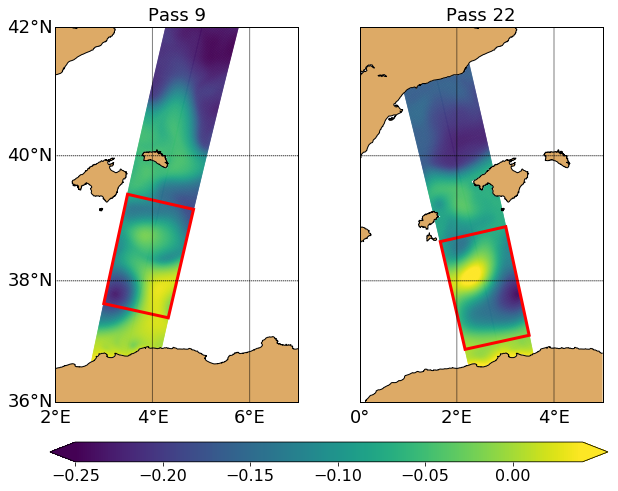

In [17]:
gs = gridspec.GridSpec(2, 2, height_ratios=[0.95, .05], width_ratios=[1, 1])

fig1 = plt.figure(figsize=(10, 8))  # figsize = (width ,height)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

axC = plt.subplot(gs[1, :])

lomin = box09[0]
lomax = box09[1]
lamin = box09[2]
lamax = box09[3]

my_map1 = Basemap(projection='merc', lat_0=(lamin+lamax)/2, lon_0=(lomin+lomax)/2, 
resolution = 'h', ax = ax1,
llcrnrlon = lomin, llcrnrlat= lamin,
urcrnrlon = lomax, urcrnrlat = lamax, area_thresh = 10)

ny_t = var1.shape[0]; nx_t = var1.shape[1]
lons_t, lats_t = my_map1.makegrid(nx_t, ny_t) # get lat/lons of ny by nx evenly space grid
x, y = my_map1(lons_t, lats_t) # compute map proj coordinates

my_map1.drawcoastlines() 
my_map1.drawmapboundary()
my_map1.drawcountries() 
my_map1.fillcontinents(color='#ddaa66')
my_map1.drawmeridians(np.arange(-160, 140, 2), labels=[1,0,0,1], size=18)
my_map1.drawparallels(np.arange(0, 70, 2), labels=[1,0,0,1], size=18)

c1 = my_map1.scatter(lon_ma09, lat_ma09, s=1, c=var1, latlon=True, linewidth=0, vmin=vmin
                     , vmax=vmax, cmap = cmap)
c1.set_clim([vmin, vmax])

milon = sub_box09[0]
malon = sub_box09[1]
milat = sub_box09[2]
malat = sub_box09[3]

lats = [ lat_ma09[milat,milon], lat_ma09[milat,malon], lat_ma09[malat,malon], lat_ma09[malat,milon] ]
lons = [ lon_ma09[milat,milon], lon_ma09[milat,malon], lon_ma09[malat,malon], lon_ma09[malat,milon] ]
x, y = my_map1( lons, lats )
xy = zip(x,y)
poly = Polygon( xy, facecolor='None', edgecolor='red', linewidth=3)
ax1.add_patch(poly)

ax1.set_title('Pass 9', size=18)

lomin = box22[0]
lomax = box22[1]
lamin = box22[2]
lamax = box22[3]

my_map2 = Basemap(projection='merc', lat_0=(lamin+lamax)/2, lon_0=(lomin+lomax)/2
                  , resolution = 'h', ax = ax2, llcrnrlon = lomin, llcrnrlat= lamin
                  , urcrnrlon = lomax, urcrnrlat = lamax, area_thresh = 10)

ny_t = var2.shape[0]; nx_t = var2.shape[1]
lons_t, lats_t = my_map2.makegrid(nx_t, ny_t) # get lat/lons of ny by nx evenly space grid.
x, y = my_map2(lons_t, lats_t) # compute map proj coordinates.

my_map2.drawcoastlines() 
my_map2.drawcountries() 
my_map2.drawmapboundary()
my_map2.fillcontinents(color='#ddaa66')
my_map2.drawmeridians(np.arange(-160, 140, 2), labels=[1,0,0,1], size=18)
my_map2.drawparallels(np.arange(0, 70, 2), labels=[0,0,0,0], size=18)

c2 = my_map2.scatter(lon_ma22, lat_ma22, s=1, c=var2, latlon=True, linewidth=0, vmin=vmin, vmax=vmax, cmap = cmap)
c2.set_clim([vmin, vmax])

cbar = plt.colorbar(c1, cax=axC, orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize=16)

milon = sub_box22[0]
malon = sub_box22[1]
milat = sub_box22[2]
malat = sub_box22[3]

lats = [ lat_ma22[milat,milon], lat_ma22[milat,malon], lat_ma22[malat,malon], lat_ma22[malat,milon] ]
lons = [ lon_ma22[milat,milon], lon_ma22[milat,malon], lon_ma22[malat,malon], lon_ma22[malat,milon] ]
x, y = my_map2( lons, lats )
xy = zip(x,y)
poly = Polygon( xy, facecolor='None', edgecolor='red', linewidth=3)
ax2.add_patch(poly)

ax2.set_title('Pass 22', size=18)

savename = 'figures/' + 'swot_box_select' + '.png'
plt.savefig(str(savename), bbox_inches='tight')
